In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
data=pd.read_csv('MNIST.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [17]:
data.shape
l = data['label']
d = data.drop(['label'],axis=1)

<h1>Displaying a Number

C:\Users\Utkarsh Alok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


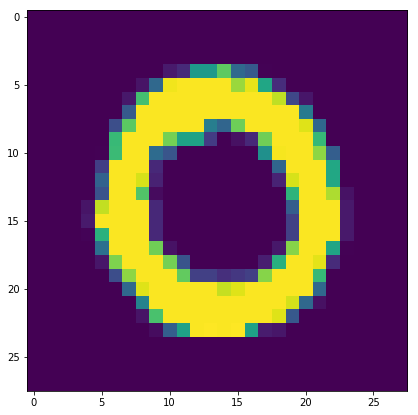

In [20]:
plt.figure(figsize=(7,7))
grid_data=d.iloc[1].as_matrix().reshape(28,28)
plt.imshow(grid_data)
plt.show()

<h1>2D Visulaisation using PCA

**Steps**<ol>Column Standardisation</ol>
<ol>Find Co-Variance Matrix(s)</ol>
<ol>Find Eigen Vectors(S)</ol>


In [21]:
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(d)

In [23]:
standardised_data.shape

(42000, 784)

In [26]:
covar_matrix=np.matmul(standardised_data.T,standardised_data)
covar_matrix.shape

(784, 784)

In [40]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))

In [39]:
print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


Projection of Original Data onto the Plane

In [60]:
new_coordinates=np.matmul(vectors.T,standardised_data.T)
new_coordinates.shape

(2, 42000)

In [61]:
new_coordinates=np.vstack((new_coordinates,l)).T

In [62]:
new_coordinates.shape

(42000, 3)

In [64]:
#Converting numpy nd-array to DataFrame
dataframe=pd.DataFrame(data=new_coordinates,columns=("1 Principle","2 Principle","Label"))
dataframe.head()

,1 Principle,2 Principle,Label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


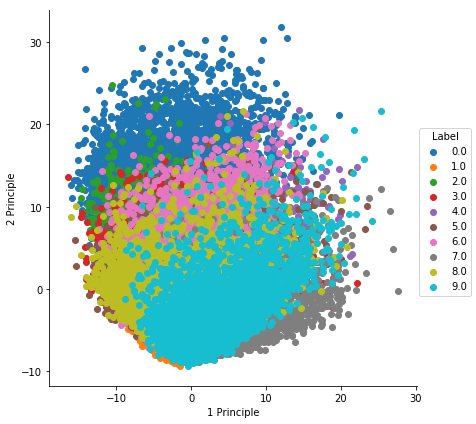

In [68]:
import seaborn as sns
sns.FacetGrid(dataframe,hue='Label',size=6).map(plt.scatter,'1 Principle','2 Principle').add_legend()
plt.show()

<h1> PCA using Scikit-Learn

In [69]:
from sklearn import decomposition
pca=decomposition.PCA()

In [79]:
pca.n_components=2
pca_data=pca.fit_transform(d)
pca_data.shape

(42000, 2)

In [82]:
pca_data=np.vstack((pca_data.T,l))
pca_data.shape

(3, 42000)

In [83]:
pca_data=pca_data.T
pca_data.shape

(42000, 3)

In [88]:
dataframe1=pd.DataFrame(pca_data,columns=('1 Principle','2 Principle','Label'))   

In [90]:
dataframe1.head()

,1 Principle,2 Principle,Label
0,-661.594475,-699.279166,1.0
1,1701.449958,-360.565050,0.0
2,-886.893170,-293.735987,1.0
3,-165.758152,300.164869,4.0
4,1923.711038,-449.167459,0.0


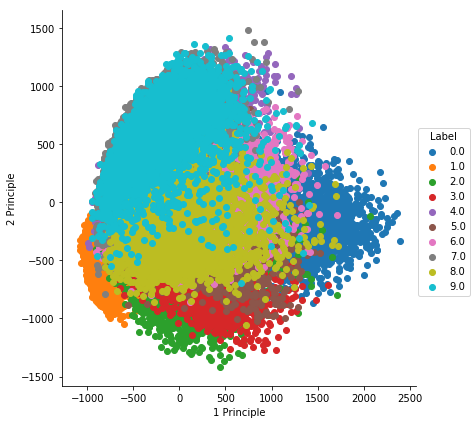

In [93]:
sns.FacetGrid(dataframe1,hue='Label',size=6).map(plt.scatter,'1 Principle','2 Principle').add_legend()
plt.show()